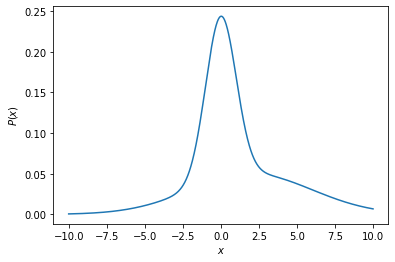

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as ss
import numpy as np


x = np.linspace(-10, 10, 1000)
alpha = 0.5
delta = 4
x_11 = np.array([ss.norm.pdf(v, loc=0, scale=1) for v in x])*alpha
x_12 = np.array([ss.norm.pdf(v, loc=2, scale=4) for v in x])*(1-alpha)
x_21 = np.array([ss.norm.pdf(v, loc=9, scale=1.3) for v in x])*alpha
x_22 = np.array([ss.norm.pdf(v, loc=9, scale=1.3) for v in x])*(1-alpha)
x_1 = np.sum([x_11, x_12], axis=0)
 
plt.plot(x, x_1, '-')
plt.xlabel('$x$')
plt.ylabel('$P(x)$')
plt.show()

In [2]:
def get_sample(n , alpha ,delta = 1,x_1 = 1):
    #numpy.random.seed(0x5eed)

    # Parameters of the mixture components
    norm_params = np.array([[0 , 1],
                            [2 , 4]])
    n_components = norm_params.shape[0]
    # Weight of each component, in this case all of them are 1/3
    weights = np.array([alpha , (1 - alpha)], dtype=np.float64) 
    # A stream of indices from which to choose the component
    mixture_idx = np.random.choice(len(weights), size=n, replace=True, p=weights)
    # y is the mixture sample
    y = np.fromiter((ss.norm.rvs(*(norm_params[i])) for i in mixture_idx),
                       dtype=np.float64)
    if x_1 == 0:
        y = y + delta
        
    return y
    

In [3]:
n = 10000
alpha = 0.5

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


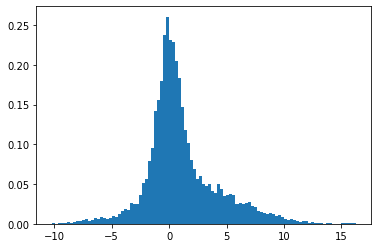

In [4]:
#plt.plot(get_sample(10,0.5))

y = plt.hist(get_sample(n , alpha , delta = 20 , x_1 =1) , normed=True, bins="fd")

In [38]:
ss.wilcoxon(get_sample(1000 , 0.9 , delta = 20 , x_1 =1) ,get_sample(1000 , 0.9 , delta = 1 , x_1 =0)  )[1]

7.155506930002308e-52

посчитаем эмпирическую мощность

In [68]:
def num_of_rej(alpha , delta , experiments , level ):
    power = []
    
    c = [50,100,200,500,1000]
    for i in c:
        sub_power = []
        rej = 0
        for k in range(experiments):
             
            if ss.wilcoxon(get_sample(i , alpha , delta = delta , x_1 =1) , get_sample(i , alpha , delta = delta , x_1 =0))[1] <= level:
                rej += 1
        power.append(rej / experiments)
        #print(rej)
    #power.append(sub_power)
    return power

In [60]:
c = num_of_rej(0.5 , 1 , 100 , 0.05)

37
72
92
100
100
100


In [61]:
len(c)

6

In [63]:
c

[0.37, 0.72, 0.92, 1.0, 1.0, 1.0]

In [ ]:
len()

In [69]:
alpha = np.linspace(0,1,20)
delta = np.linspace(0,2,20)

In [73]:
v = 0
a_d_power = []
for a in alpha:
    d_power = []
    for d in delta:
        d_power.append(num_of_rej(a ,d ,100 , 0.05))
    a_d_power.append(d_power)
    print(v)
    v += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [71]:
len(a_d_power)

[]

In [81]:
def show_w_d(alpha , a_d_power , a):
    plt.figure()
    c = [50,100,200,500,1000]
    for i,j in enumerate(c):
        plt.plot(alpha , np.array(a_d_power)[a,:,i] , label = 'sample_{}'.format(j))
    plt.legend(loc='lower right')
    plt.show()
    
def show_w_a(alpha , a_d_power , d):
    plt.figure()
    c = [50,100,200,500,1000]
    for i,j in enumerate(c):
        plt.plot(alpha , np.array(a_d_power)[:,d,i] , label = 'sample_{}'.format(j))
    plt.legend(loc='upper left')
    plt.show()

# посмотрим на зависимость W от alpha и delta

## зависимость W(alpha)

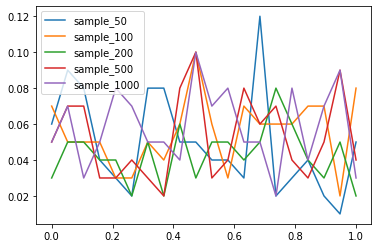

In [91]:

show_w_a(alpha , a_d_power , 0)

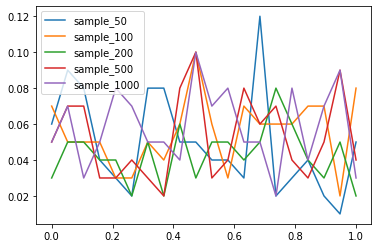

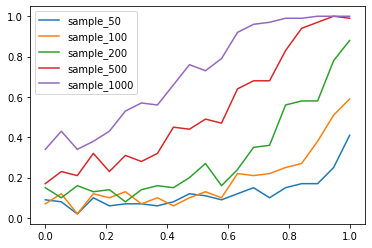

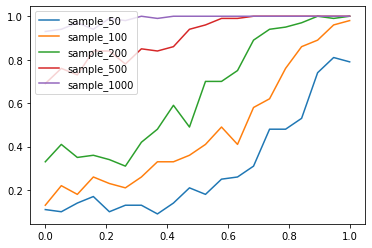

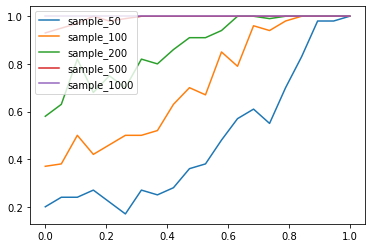

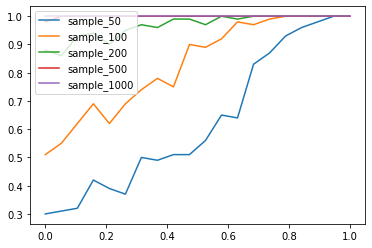

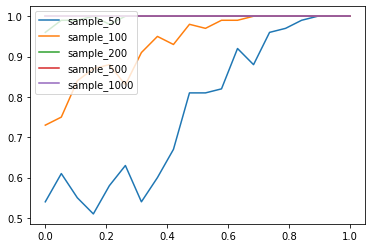

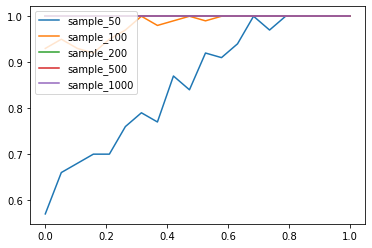

In [88]:
for i in range(0,20,3):
    show_w_a(alpha , a_d_power , i)
    

итак что мы видим тут delta увеличивается сверху вниз => значит распределения становятся более разделенными

мы видим что с ростом delta зависимось от alpha становится более явной к сожалению я менял delta [0;2] 

видим что при малом delta зависимости от alpha почти нет (что понятно ведь распределения одни и те же))

при достаточно больших delta (>=1) видим что при росте alpha мощность нашей процедуры растет (что логично ведь распределения становятся более концентрированными)

очевидно что так же есть корреляция с количеством семплов (чем их больше тем мощнее процедура)

## зависимость W(delta)

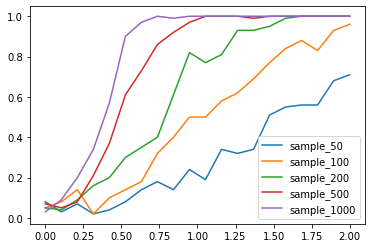

In [92]:
 show_w_d(delta , a_d_power , 2)

тут уже alpha растет от 0->1 сверху вниз

тут так же как и в прошлый раз очевидна зависимость между мощностью и количеством семплов 

чем больше alpha тем более сконцентрированные распределения и тем раньше (на меньших delta) мощность критерия достигает 1



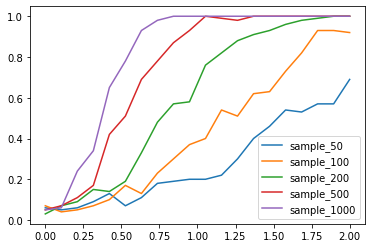

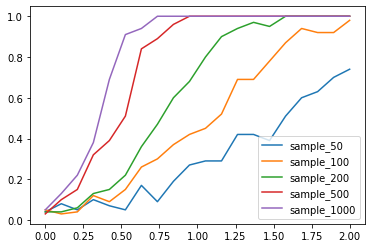

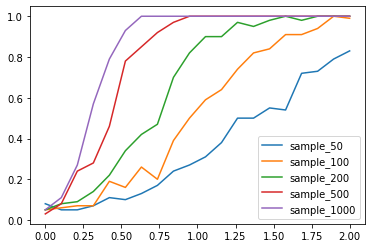

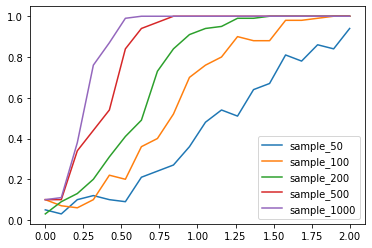

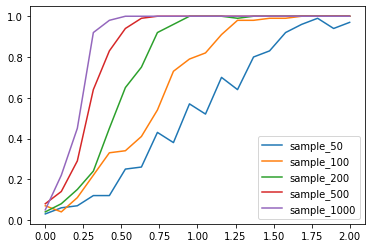

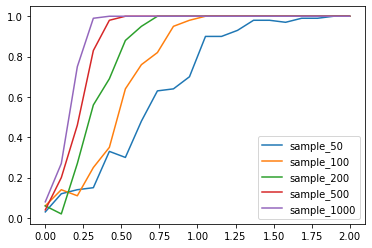

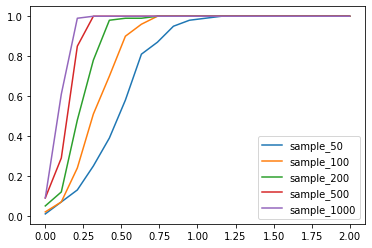

In [93]:
for i in range(0,20,3):
    show_w_d(delta , a_d_power , i)

# вывод

таким образом 

мощность растет при росте delta

мощность растет при росте alpha